In [1]:
# 📌 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal, ttest_ind, mannwhitneyu
from statannotations.Annotator import Annotator




In [2]:

# 📌 2. Carregamento dos dados
df = pd.read_csv("cardapio_final.csv")
df.head()

,Data,refeicao,total_refeicao,cardapio_padrao,cardapio_vegano,Dia_Semana,Mes,dia,precip,ano,tavg,tmin,tmax,cardapio_trans,chuva,Ferias
0,2024-01-02,Almoço,1012,STROGONOFF DE FRANGO,STROGONOFF VEGANO (PTS),Terça,1,2,0.00,2024,24.9,20.0,31.0,strogonoff,nao chuva,Férias
1,2024-01-02,Jantar,450,"BIFE AO MOLHO ROTY (CALDO DE CARNE, MOLHO SHOY...",FEIJÃO BRANCO COM QUIABO,Terça,1,2,0.00,2024,24.9,20.0,31.0,carne bovina,nao chuva,Férias
2,2024-01-03,Almoço,1276,PERNIL ASSADO AO MOLHO ESCURO (MOLHOS SHOYO E ...,FEIJÃO BRANCO COM VAGEM E ABÓBORA,Quarta,1,3,10.16,2024,24.9,20.0,32.0,carne suína,chuva,Férias
3,2024-01-03,Jantar,554,ISCAS DE FRANGO ACEBOLADO,ERVILHA PARTIDA COM CENOURA E PIMENTÃO VERMELHO,Quarta,1,3,10.16,2024,24.9,20.0,32.0,frango,chuva,Férias
4,2024-01-04,Almoço,1385,CARNE DE PANELA COM AZEITONA,ERVILHA PARTIDA COM CHUCHU,Quinta,1,4,0.00,2024,24.4,21.0,30.0,carne bovina,nao chuva,Férias


In [3]:
df.info()
# Verificar valores ausentes
df.isnull().sum()
#correção de tipos
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
#remoção de NaN
df = df.dropna().reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data             1001 non-null   object 
 1   refeicao         1001 non-null   object 
 2   total_refeicao   1001 non-null   int64  
 3   cardapio_padrao  999 non-null    object 
 4   cardapio_vegano  1001 non-null   object 
 5   Dia_Semana       1001 non-null   object 
 6   Mes              1001 non-null   int64  
 7   dia              1001 non-null   int64  
 8   precip           1001 non-null   float64
 9   ano              1001 non-null   int64  
 10  tavg             1001 non-null   float64
 11  tmin             1001 non-null   float64
 12  tmax             1001 non-null   float64
 13  cardapio_trans   999 non-null    object 
 14  chuva            1001 non-null   object 
 15  Ferias           1001 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 125.3+ KB
<

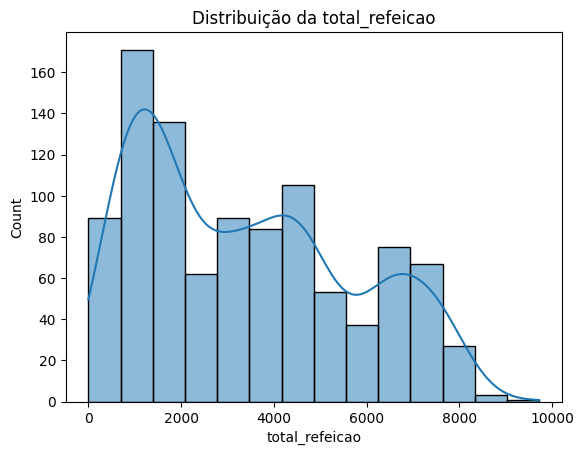

In [4]:

# 📌 4. Visualização da distribuição da total_refeicao
sns.histplot(df["total_refeicao"], kde=True)
plt.title("Distribuição da total_refeicao")
plt.show()


In [5]:

# 📌 5. Teste de normalidade (Shapiro-Wilk)
stat, p = shapiro(df["total_refeicao"])
print(f"Shapiro-Wilk: estatística={stat:.3f}, p-valor={p:.2e}")
if p > 0.05:
    print("Distribuição provavelmente normal.")
else:
    print("Distribuição não é normal.")


Shapiro-Wilk: estatística=0.932, p-valor=7.75e-21
Distribuição não é normal.


In [6]:

# 📌 6. Teste de normalidade por grupo de proteína
for grupo in df["cardapio_trans"].unique():
    dados = df[df["cardapio_trans"] == grupo]["total_refeicao"]
    stat, p = shapiro(dados)
    print(f"{grupo}: p-valor={p:.2e}")


strogonoff: p-valor=2.26e-02
carne bovina: p-valor=1.59e-12
carne suína: p-valor=6.10e-07
frango: p-valor=6.00e-10
outros: p-valor=1.23e-02
peixe: p-valor=7.84e-05
feijoada: p-valor=2.16e-02


In [7]:

# 📌 7. Teste de diferença entre grupos (Kruskal-Wallis)
grupos = df.groupby("cardapio_trans")["total_refeicao"].apply(list)
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis: estatística={stat:.2f}, p-valor={p:.2e}")
if p < 0.05:
    print("Diferença estatística significativa entre os grupos.")
else:
    print("Não há diferença estatística significativa entre os grupos.")


Kruskal-Wallis: estatística=44.07, p-valor=7.16e-08
Diferença estatística significativa entre os grupos.


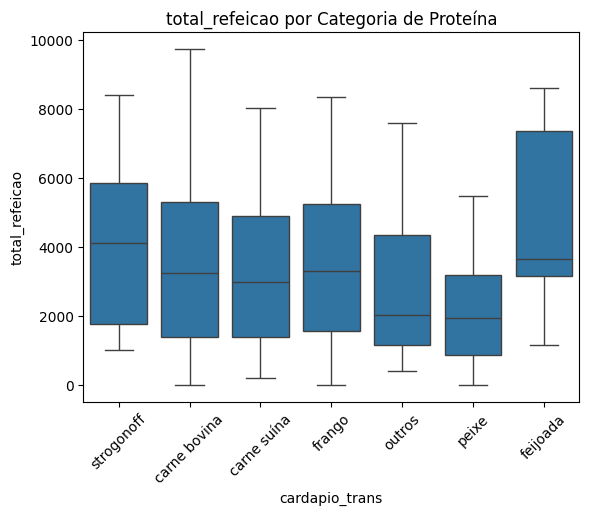

In [8]:

# 📌 8. Visualização com boxplot
sns.boxplot(x="cardapio_trans", y="total_refeicao", data=df)
plt.title("total_refeicao por Categoria de Proteína")
plt.xticks(rotation=45)
plt.show()

In [9]:
# 📌 9. Teste de diferença entre dias com e sem chuva

# Separar os grupos
sem_chuva = df[df["chuva"] == 'nao chuva']["total_refeicao"]
com_chuva = df[df["chuva"] == 'chuva']["total_refeicao"]

# Teste de normalidade
p1 = shapiro(sem_chuva)[1]
p2 = shapiro(com_chuva)[1]

# Escolher o teste
if p1 > 0.05 and p2 > 0.05:
    stat, p = ttest_ind(sem_chuva, com_chuva)
    print("Teste t de Student aplicado")
else:
    stat, p = mannwhitneyu(sem_chuva, com_chuva)
    print("Teste Mann-Whitney U aplicado")

print(f"Estatística: {stat:.3f}, p-valor: {p:.2e}")
if p < 0.05:
    print("Diferença estatística significativa entre dias com e sem chuva.")
else:
    print("Não há diferença estatística significativa entre os grupos.")

Teste Mann-Whitney U aplicado
Estatística: 104170.000, p-valor: 1.35e-02
Diferença estatística significativa entre dias com e sem chuva.


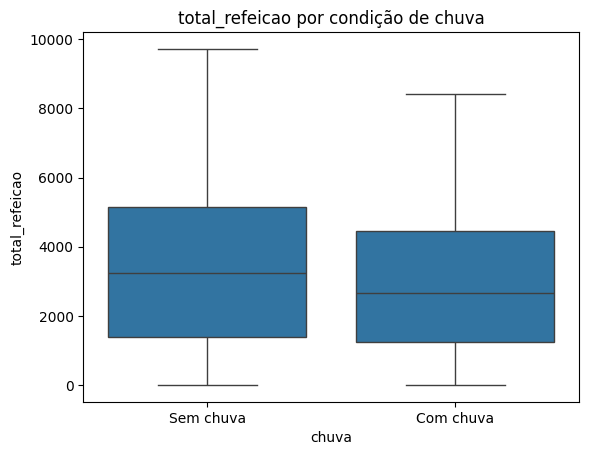

In [10]:
sns.boxplot(x="chuva", y="total_refeicao", data=df)
plt.xticks([0, 1], ["Sem chuva", "Com chuva"])
plt.title("total_refeicao por condição de chuva")
plt.show()

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\3383451469.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


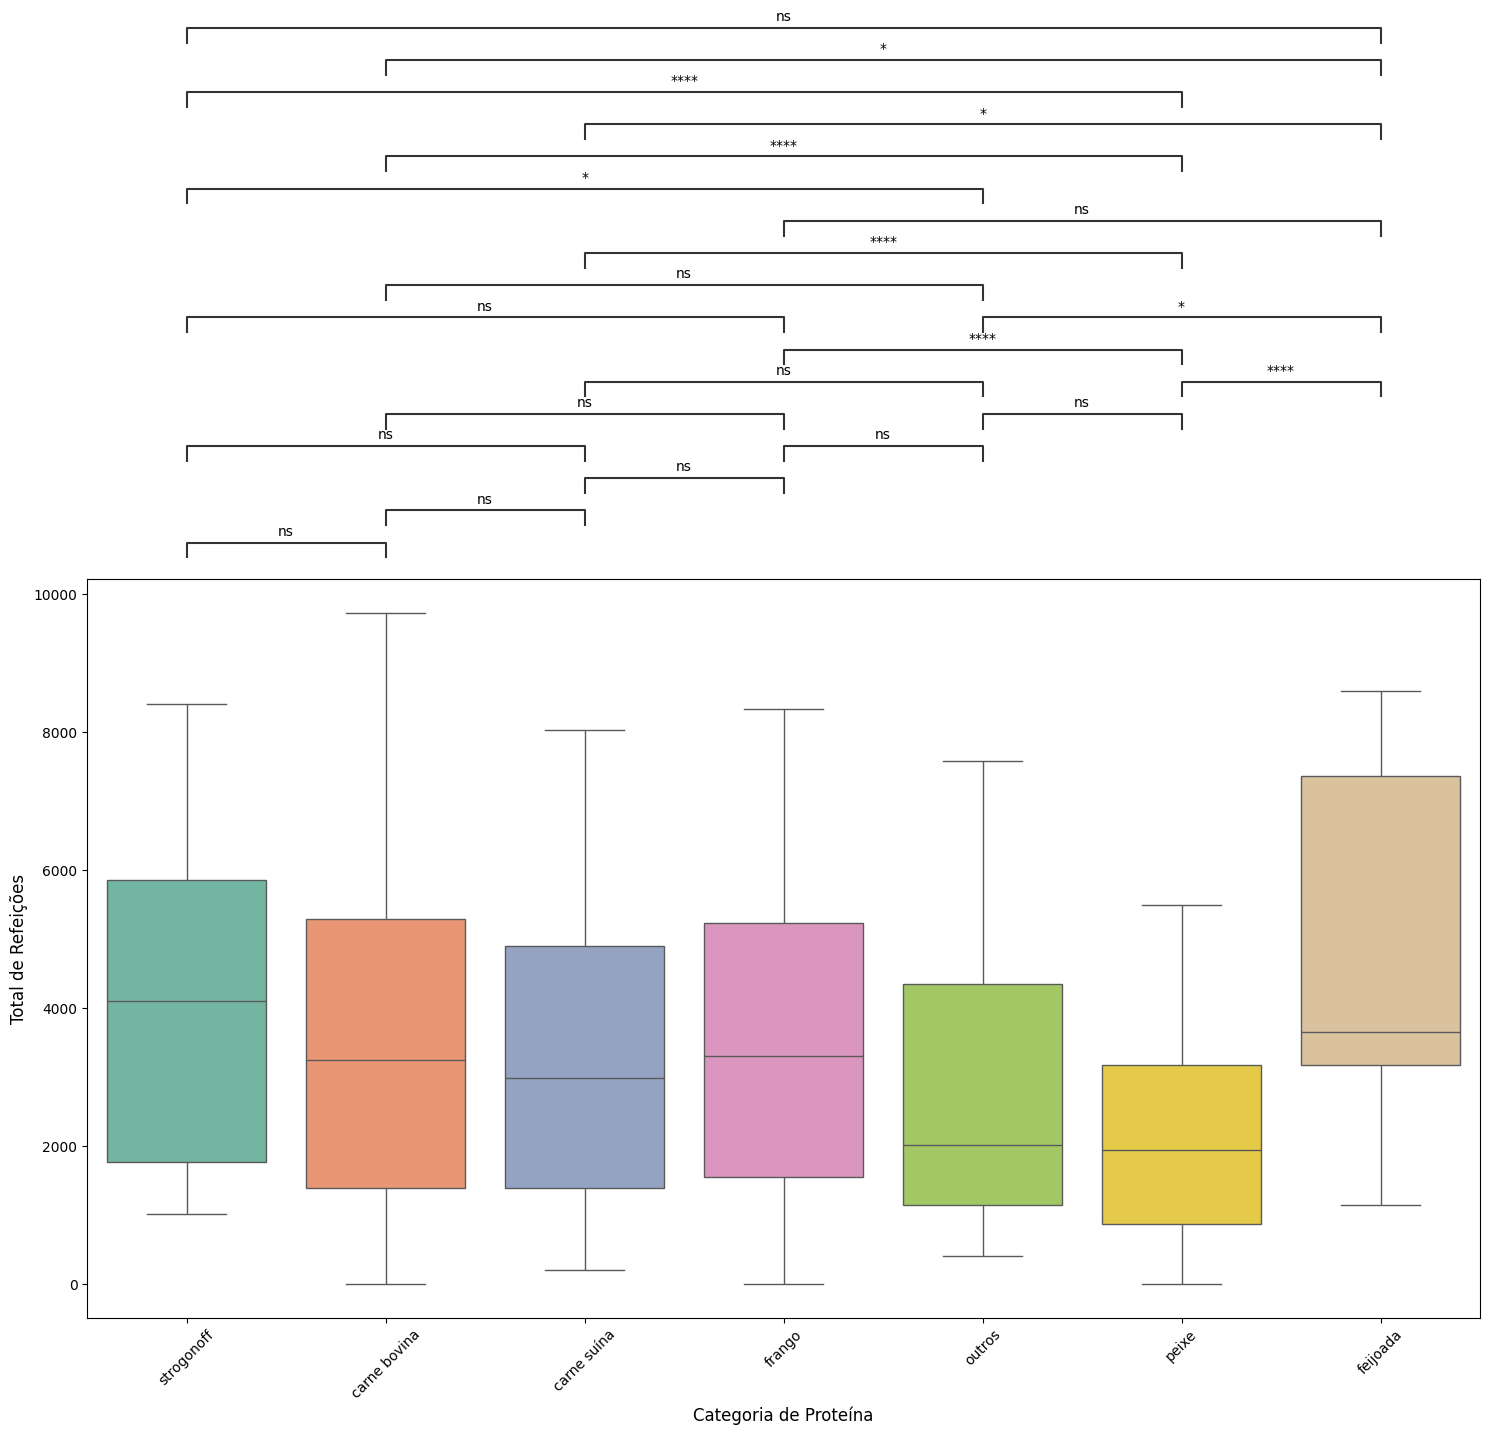

In [11]:
# Definindo as comparações dinamicamente (combinações únicas sem ordem)
from itertools import combinations

unique_items = df['cardapio_trans'].unique().tolist()
# Gera todas as combinações únicas (a,b) com a < b — isto remove (a,a) e também remove pares invertidos (b,a)
comparisons = [(str(a), str(b)) for a, b in combinations(unique_items, 2)]

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 20))

# Criando o boxplot
sns.boxplot(
    x="cardapio_trans",
    y="total_refeicao",
    data=df,
    palette="Set2",
    ax=ax
)

# Configurando as anotações estatísticas para aparecerem mais acima
annotator = Annotator(ax, comparisons, data=df, x="cardapio_trans", y="total_refeicao")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", 
                   line_height=0.02,  # Altura das linhas de conexão
                   text_offset=3,     # Deslocamento do texto
                   verbose=0)
annotator.apply_test()
annotator.annotate()

# Personalizando o gráfico
#ax.set_title("Distribuição do Total de Refeições por Categoria de Proteína", fontsize=14, pad=50)
ax.set_xlabel("Categoria de Proteína", fontsize=12)
ax.set_ylabel("Total de Refeições", fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Ajustando margens
plt.subplots_adjust(top=0.85)  # Aumentando o espaço superior
fig.tight_layout()

plt.show()

In [12]:
# Análise Estatística Completa das Categorias de Cardápio

# 1. Teste de Normalidade por Categoria (Shapiro-Wilk)
print("1. Teste de Normalidade por Categoria:")
print("-" * 50)
normality_results = {}
for categoria in df['cardapio_trans'].unique():
    dados = df[df['cardapio_trans'] == categoria]['total_refeicao']
    stat, p_valor = shapiro(dados)
    normality_results[categoria] = {'estatística': stat, 'p_valor': p_valor}
    print(f"Categoria: {categoria}")
    print(f"Estatística Shapiro-Wilk: {stat:.4f}")
    print(f"p-valor: {p_valor:.4e}")
    print(f"Conclusão: {'Não normal' if p_valor < 0.05 else 'Possivelmente normal'}")
    print("-" * 50)

# 2. Teste Global (Kruskal-Wallis)
print("\n2. Teste Global (Kruskal-Wallis):")
print("-" * 50)
grupos = [group['total_refeicao'].values for name, group in df.groupby('cardapio_trans')]
h_stat, p_valor = kruskal(*grupos)
print(f"Estatística H: {h_stat:.4f}")
print(f"p-valor: {p_valor:.4e}")
print(f"Conclusão: {'Há diferenças significativas entre os grupos' if p_valor < 0.05 else 'Não há diferenças significativas entre os grupos'}")

# 3. Teste Alternativo: Teste de Levene para Homogeneidade de Variâncias
from scipy.stats import levene
print("\n3. Teste de Homogeneidade de Variâncias (Levene):")
print("-" * 50)
levene_stat, levene_p = levene(*grupos)
print(f"Estatística Levene: {levene_stat:.4f}")
print(f"p-valor: {levene_p:.4e}")
print(f"Conclusão: {'Variâncias são diferentes' if levene_p < 0.05 else 'Variâncias são homogêneas'}")

1. Teste de Normalidade por Categoria:
--------------------------------------------------
Categoria: strogonoff
Estatística Shapiro-Wilk: 0.9213
p-valor: 2.2596e-02
Conclusão: Não normal
--------------------------------------------------
Categoria: carne bovina
Estatística Shapiro-Wilk: 0.9299
p-valor: 1.5887e-12
Conclusão: Não normal
--------------------------------------------------
Categoria: carne suína
Estatística Shapiro-Wilk: 0.9309
p-valor: 6.1049e-07
Conclusão: Não normal
--------------------------------------------------
Categoria: frango
Estatística Shapiro-Wilk: 0.9309
p-valor: 5.9967e-10
Conclusão: Não normal
--------------------------------------------------
Categoria: outros
Estatística Shapiro-Wilk: 0.8884
p-valor: 1.2307e-02
Conclusão: Não normal
--------------------------------------------------
Categoria: peixe
Estatística Shapiro-Wilk: 0.9369
p-valor: 7.8434e-05
Conclusão: Não normal
--------------------------------------------------
Categoria: feijoada
Estatística 

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\913559655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


ValueError: test value should be a StatTest instance or one of the following strings: t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal, Brunner-Munzel.

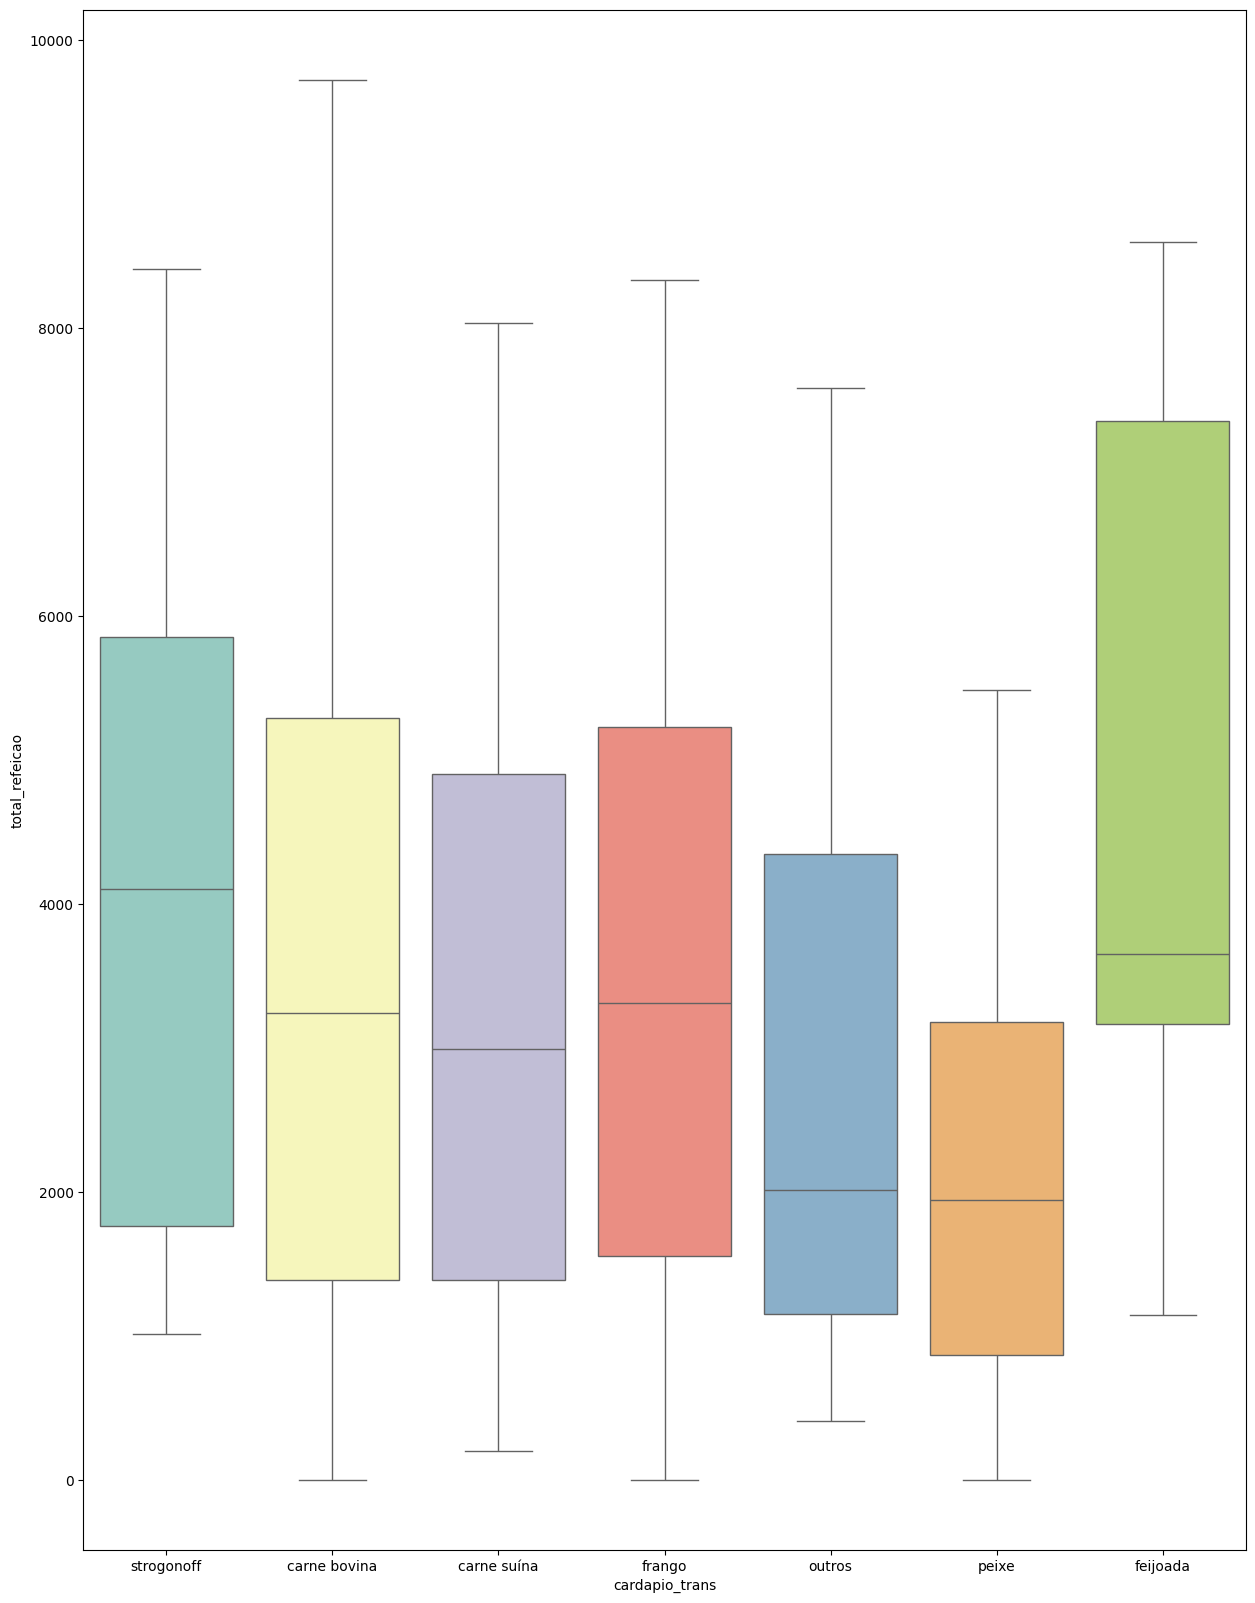

In [13]:
from scipy.stats import ranksums
from itertools import combinations

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 20))

# Criando o boxplot
sns.boxplot(
    x="cardapio_trans",
    y="total_refeicao",
    data=df,
    palette="Set3",  # Usando uma paleta diferente para distinguir do gráfico anterior
    ax=ax
)

# Definindo as comparações
unique_items = df['cardapio_trans'].unique().tolist()
comparisons = [(str(a), str(b)) for a, b in combinations(unique_items, 2)]

# Configurando as anotações estatísticas
annotator = Annotator(ax, comparisons, data=df, x="cardapio_trans", y="total_refeicao")
annotator.configure(
    test=ranksums,  # Usando Wilcoxon rank-sum test
    text_format="star",
    loc="outside",
    line_height=0.02,
    text_offset=3,
    verbose=0
)
annotator.apply_test()
annotator.annotate()

# Personalizando o gráfico
ax.set_xlabel("Categoria de Proteína", fontsize=12)
ax.set_ylabel("Total de Refeições", fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Ajustando margens
plt.subplots_adjust(top=0.85)
fig.tight_layout()

plt.show()

# Comparando os resultados numericamente
print("\nComparação detalhada dos testes Mann-Whitney vs Wilcoxon rank-sum:")
print("-" * 80)
print(f"{'Comparação':<30} {'Mann-Whitney p-valor':<20} {'Wilcoxon p-valor':<20}")
print("-" * 80)

for cat1, cat2 in comparisons:
    grupo1 = df[df['cardapio_trans'] == cat1]['total_refeicao']
    grupo2 = df[df['cardapio_trans'] == cat2]['total_refeicao']
    
    # Mann-Whitney U test
    mw_stat, mw_p = mannwhitneyu(grupo1, grupo2)
    
    # Wilcoxon rank-sum test
    w_stat, w_p = ranksums(grupo1, grupo2)
    
    print(f"{cat1} vs {cat2:<20} {mw_p:< 20.4e} {w_p:< 20.4e}")

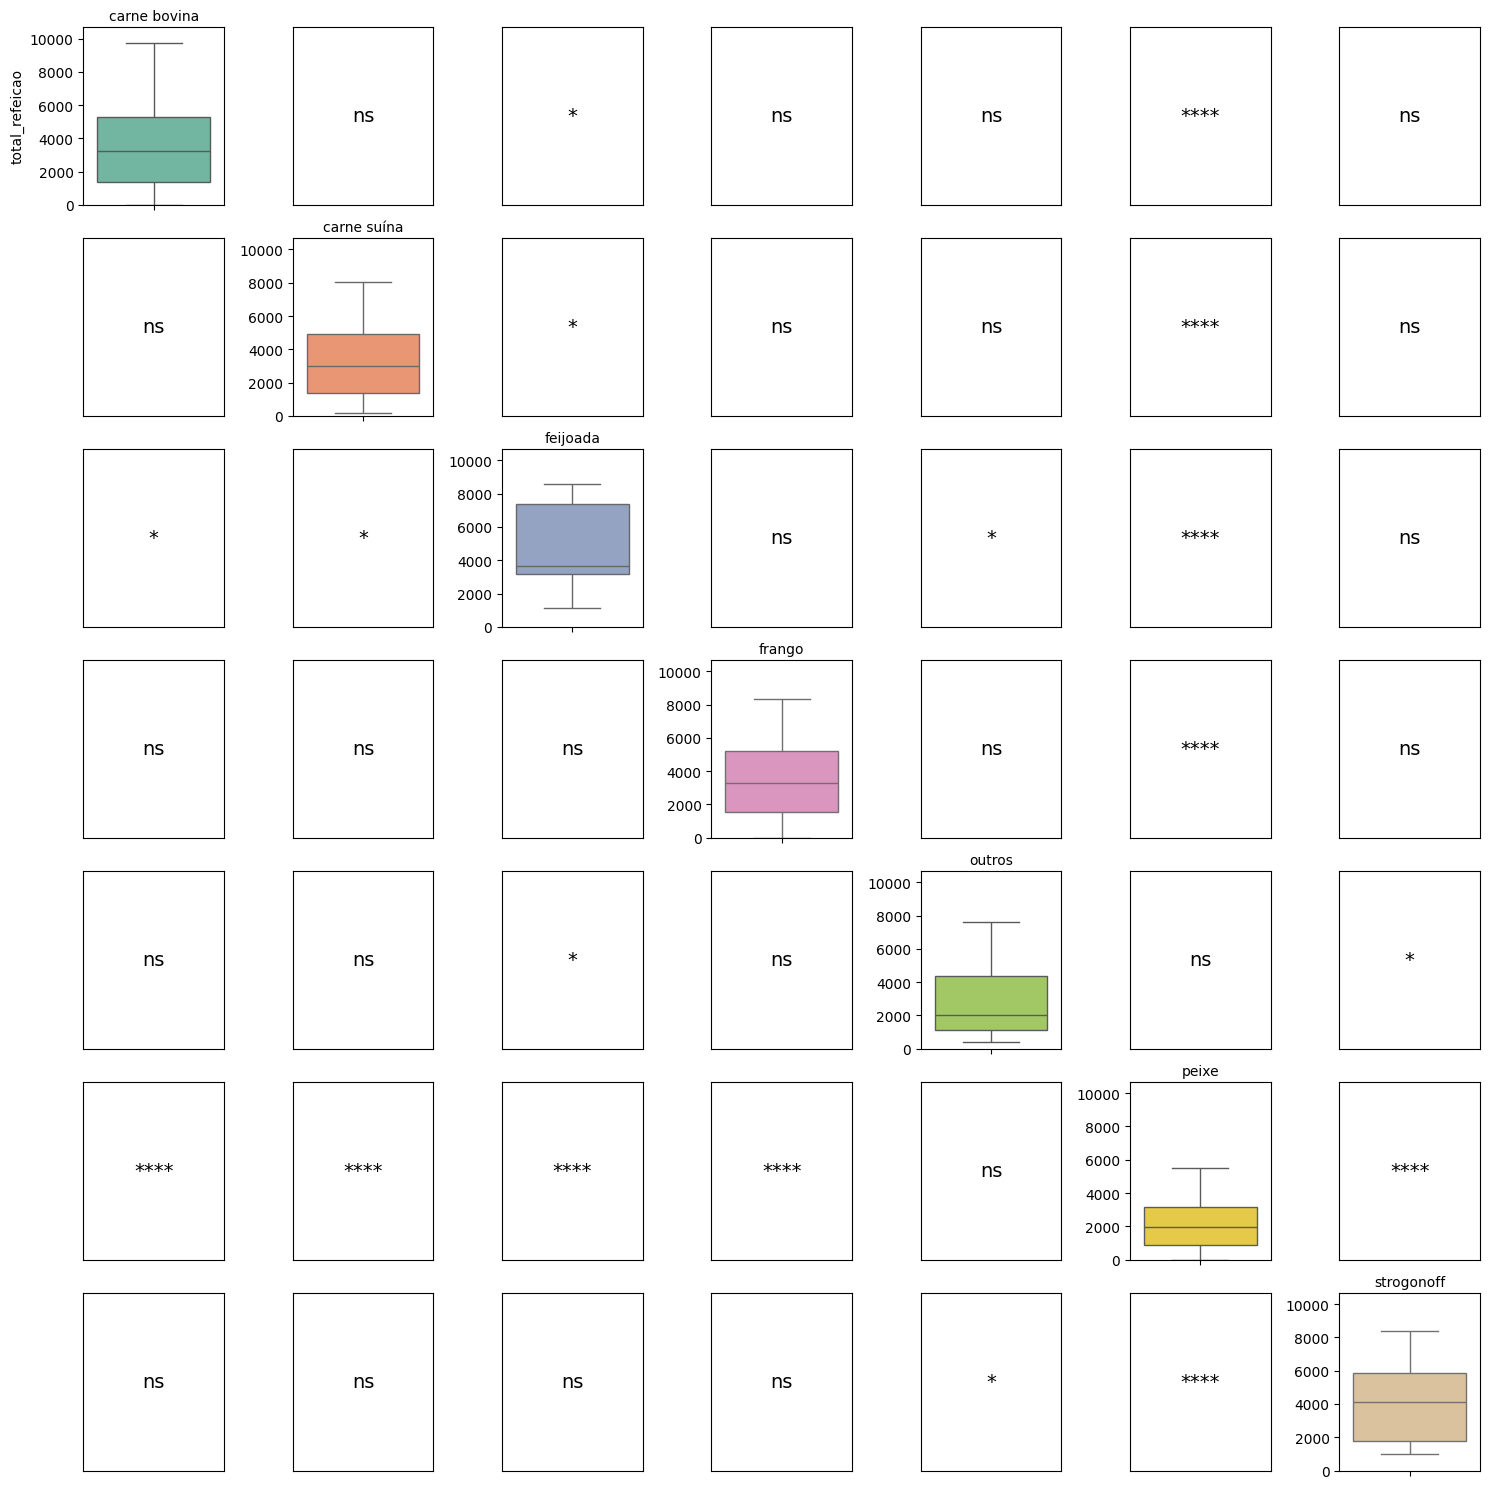


Legenda da significância estatística:
ns : p > 0.05
*  : p ≤ 0.05
** : p ≤ 0.01
***: p ≤ 0.001
****: p ≤ 0.0001


In [14]:
import numpy as np
from matplotlib.gridspec import GridSpec

# Obter categorias únicas
categories = sorted(df['cardapio_trans'].unique())
n = len(categories)

# Criar figura com GridSpec
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(n, n, figure=fig)

# Função para converter p-valor em asteriscos
def pvalue_to_stars(p):
    if p > 0.05:
        return "ns"
    elif p > 0.01:
        return "*"
    elif p > 0.001:
        return "**"
    elif p > 0.0001:
        return "***"
    else:
        return "****"

# Criar matriz de subplots
for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i, j])
        
        if i == j:  # Diagonal: boxplots
            sns.boxplot(data=df[df['cardapio_trans'] == categories[i]], 
                       y='total_refeicao', 
                       color=sns.color_palette("Set2")[i],
                       ax=ax)
            ax.set_title(categories[i], pad=5, fontsize=10)
            
            # Remover labels dos eixos exceto na primeira coluna/última linha
            if j != 0:
                ax.set_ylabel('')
            if i != n-1:
                ax.set_xlabel('')
                
        else:  # Fora da diagonal: p-valores
            # Calcular p-valor
            grupo1 = df[df['cardapio_trans'] == categories[i]]['total_refeicao']
            grupo2 = df[df['cardapio_trans'] == categories[j]]['total_refeicao']
            _, p_val = mannwhitneyu(grupo1, grupo2)
            
            # Mostrar asteriscos
            ax.text(0.5, 0.5, pvalue_to_stars(p_val), 
                   ha='center', va='center',
                   fontsize=14)
            
            # Remover eixos
            ax.set_xticks([])
            ax.set_yticks([])
            
        # Ajustar limites do boxplot para serem consistentes
        if i == j:
            ax.set_ylim(df['total_refeicao'].min() * 0.9, 
                       df['total_refeicao'].max() * 1.1)

# Ajustar layout
plt.tight_layout()
plt.show()

# Adicionar legenda dos asteriscos
print("\nLegenda da significância estatística:")
print("ns : p > 0.05")
print("*  : p ≤ 0.05")
print("** : p ≤ 0.01")
print("***: p ≤ 0.001")
print("****: p ≤ 0.0001")

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\1374330009.py:71: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


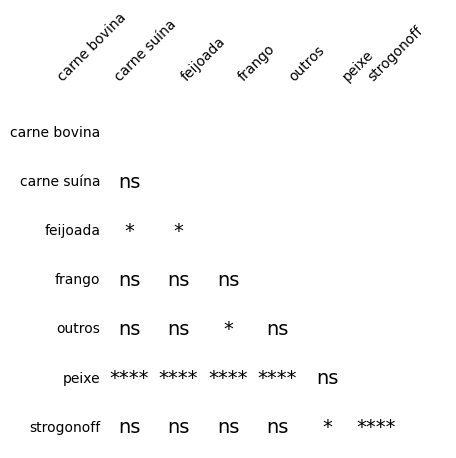


Legenda da significância estatística:
ns : p > 0.05
*  : p ≤ 0.05
** : p ≤ 0.01
***: p ≤ 0.001
****: p ≤ 0.0001


In [15]:
import numpy as np
from matplotlib.gridspec import GridSpec

# Obter categorias únicas
categories = sorted(df['cardapio_trans'].unique())
n = len(categories)

# Criar figura com GridSpec e adicionar espaço para labels
fig = plt.figure(figsize=(5, 5))  # Reduzindo um pouco o tamanho já que não temos mais boxplots
gs = GridSpec(n+1, n+1, figure=fig)

# Função para converter p-valor em asteriscos
def pvalue_to_stars(p):
    if p > 0.05:
        return "ns"
    elif p > 0.01:
        return "*"
    elif p > 0.001:
        return "**"
    elif p > 0.0001:
        return "***"
    else:
        return "****"

# Adicionar labels das colunas (rotacionados)
for j, cat in enumerate(categories):
    ax = fig.add_subplot(gs[0, j+1])
    ax.text(0.5, 0.5, cat, 
            ha='right', va='bottom',
            rotation=45,
            fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

# Adicionar labels das linhas
for i, cat in enumerate(categories):
    ax = fig.add_subplot(gs[i+1, 0])
    ax.text(1.0, 0.5, cat,
            ha='right', va='center',
            fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

# Criar matriz de subplots
for i in range(n):
    for j in range(n):
        # Pular se estiver acima ou na diagonal
        if j >= i:
            continue
            
        ax = fig.add_subplot(gs[i+1, j+1])
        
        # Calcular p-valor
        grupo1 = df[df['cardapio_trans'] == categories[i]]['total_refeicao']
        grupo2 = df[df['cardapio_trans'] == categories[j]]['total_refeicao']
        _, p_val = mannwhitneyu(grupo1, grupo2)
        
        # Mostrar asteriscos
        ax.text(0.5, 0.5, pvalue_to_stars(p_val), 
               ha='center', va='center',
               fontsize=14)
        
        # Remover eixos e borda
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)

# Ajustar layout
plt.tight_layout()
plt.show()

# Adicionar legenda dos asteriscos
print("\nLegenda da significância estatística:")
print("ns : p > 0.05")
print("*  : p ≤ 0.05")
print("** : p ≤ 0.01")
print("***: p ≤ 0.001")
print("****: p ≤ 0.0001")

In [ ]:
# Função para converter p-valor em asteriscos
def pvalue_to_stars(p):
    if p > 0.05:
        return "ns"
    elif p > 0.01:
        return "*"
    elif p > 0.001:
        return "**"
    elif p > 0.0001:
        return "***"
    else:
        return "****"

# Criar uma matriz vazia para armazenar os resultados
categories = sorted(df['cardapio_trans'].unique())
n = len(categories)
results = []

# Preencher a matriz com os p-valores convertidos em asteriscos
for i, cat1 in enumerate(categories):
    row = []
    for j, cat2 in enumerate(categories[:i+1]):  # Apenas até i+1 para ter somente a parte inferior
        if j == i:  # Diagonal
            row.append("-")
        else:  # Abaixo da diagonal
            grupo1 = df[df['cardapio_trans'] == cat1]['total_refeicao']
            grupo2 = df[df['cardapio_trans'] == cat2]['total_refeicao']
            _, p_val = mannwhitneyu(grupo1, grupo2)
            row.append(pvalue_to_stars(p_val))
    results.append(row)

# Criar o DataFrame com os resultados
import pandas as pd
df_results = pd.DataFrame(results, columns=categories[:n], index=categories)

# Exibir a tabela
print("\nTabela de significância estatística (Mann-Whitney):\n")
print(df_results)
print("\nLegenda:")
print("ns : p > 0.05")
print("*  : p ≤ 0.05")
print("** : p ≤ 0.01")
print("***: p ≤ 0.001")
print("****: p ≤ 0.0001")
print("-  : mesma categoria")


Tabela de significância estatística (Mann-Whitney):

             carne bovina carne suína feijoada frango outros peixe strogonoff
carne bovina            -        None     None   None   None  None       None
carne suína            ns           -     None   None   None  None       None
feijoada                *           *        -   None   None  None       None
frango                 ns          ns       ns      -   None  None       None
outros                 ns          ns        *     ns      -  None       None
peixe                ****        ****     ****   ****     ns     -       None
strogonoff             ns          ns       ns     ns      *  ****          -

Legenda:
ns : p > 0.05
*  : p ≤ 0.05
** : p ≤ 0.01
***: p ≤ 0.001
****: p ≤ 0.0001
-  : mesma categoria


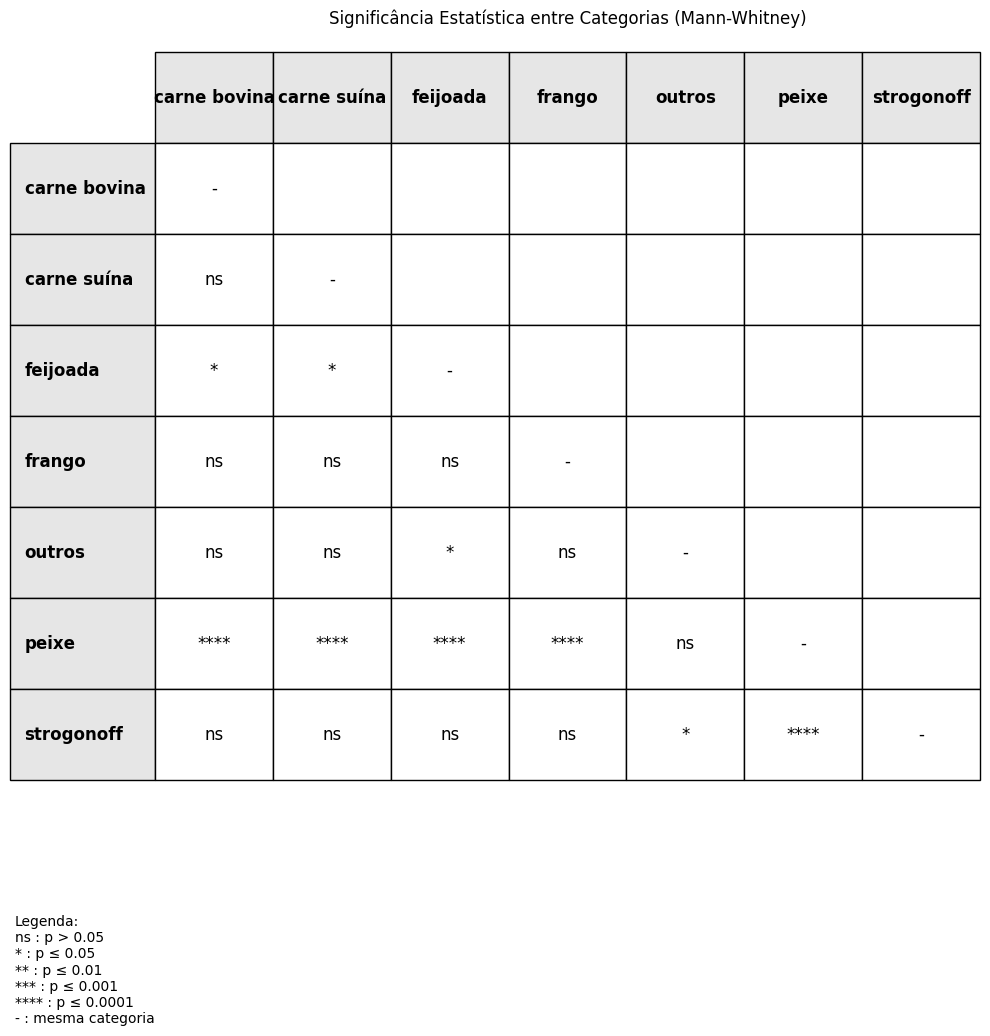

In [ ]:
# Criar a figura
fig, ax = plt.subplots(figsize=(10, 8))

# Esconder os eixos
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Criar a tabela
table_data = df_results.values
table = ax.table(cellText=table_data,
                colLabels=df_results.columns,
                rowLabels=df_results.index,
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

# Ajustar o estilo da tabela
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)  # Ajustar o tamanho das células

# Colorir as células
for pos, cell in table._cells.items():
    if pos[0] == 0:  # Cabeçalho das colunas
        cell.set_facecolor('#E6E6E6')
        cell.set_text_props(weight='bold')
    elif pos[1] == -1:  # Cabeçalho das linhas
        cell.set_facecolor('#E6E6E6')
        cell.set_text_props(weight='bold')
    else:
        cell.set_facecolor('white')

plt.title('Significância Estatística entre Categorias (Mann-Whitney)', pad=20)

# Adicionar legenda abaixo da tabela como texto
legend_text = "Legenda:\nns : p > 0.05\n* : p ≤ 0.05\n** : p ≤ 0.01\n*** : p ≤ 0.001\n**** : p ≤ 0.0001\n- : mesma categoria"
plt.figtext(0.02, -0.15, legend_text, fontsize=10, ha='left', va='top')

plt.tight_layout()
plt.show()

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\2119924005.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem chuva', 'Com chuva'], fontsize=16)


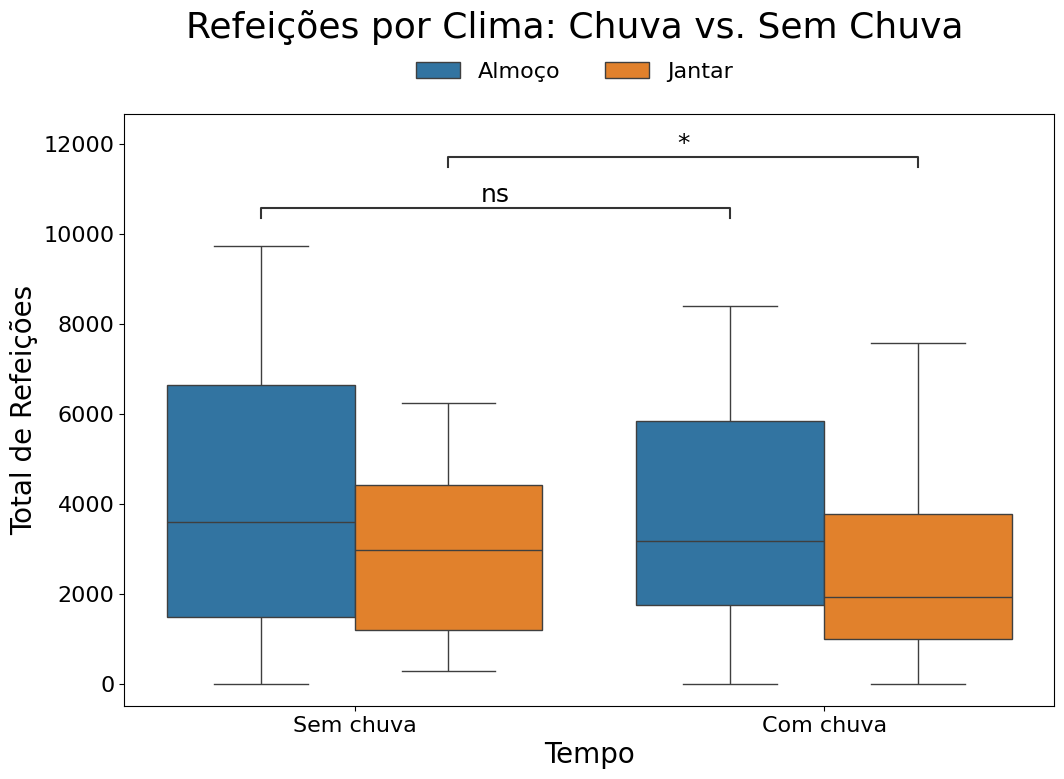

In [39]:
# Boxplot: Almoço e Janta lado a lado por condição de chuva (legenda em uma linha entre título e plot)
from statannotations.Annotator import Annotator

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(12, 8))

# Garantir o nome correto da coluna (refeicao ou Refeicao)
meal_col = 'refeicao' if 'refeicao' in df.columns else 'Refeicao'

# Ordenar categorias de chuva para consistência
chuva_order = ['nao chuva', 'chuva']

# Lista única de refeições preservando a ordem encontrada
unique_meals = list(pd.Categorical(df[meal_col]).categories) if hasattr(pd.Categorical(df[meal_col]), 'categories') else list(df[meal_col].unique())
if len(unique_meals) == 0:
    unique_meals = list(df[meal_col].unique())

# Normalização simples para detectar 'almoço' e 'janta' (ignora acentos)
import unicodedata

def normalize_text(s):
    if not isinstance(s, str):
        return ''
    return unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode().lower()

# Cores solicitadas (tons próximos às imagens)
blue = '#1f77b4'   # azul
orange = '#ff7f0e' # laranja

# Montar palette: almoços -> azul, jantas -> laranja, outros -> palette automática
palette = {}
# pre-generate fallback colors
fallback_colors = iter(sns.color_palette('Set2', n_colors=max(3, len(unique_meals))))
for meal in unique_meals:
    nm = normalize_text(meal)
    if 'almo' in nm or 'almoco' in nm:
        palette[meal] = blue
    elif 'jant' in nm or 'janta' in nm or 'jantar' in nm:
        palette[meal] = orange
    else:
        col = next(fallback_colors)
        palette[meal] = col

# Aumentar o tamanho base da fonte (maior para todos os elementos)
plt.rcParams.update({'font.size': 20})

# Título principal (usando suptitle para que a legenda do figure possa ficar entre título e axes)
fig.suptitle('Refeições por Clima: Chuva vs. Sem Chuva', fontsize=26, y=0.98)

# Desenhar boxplot com hue = refeição (cada refeição uma cor), x = chuva
ax = sns.boxplot(x='chuva', y='total_refeicao', hue=meal_col, data=df, order=chuva_order, palette=palette, ax=ax)

# Ajustar rótulos do eixo x para português
ax.set_xticklabels(['Sem chuva', 'Com chuva'], fontsize=16)
ax.set_xlabel('Tempo', fontsize=20)
ax.set_ylabel('Total de Refeições', fontsize=20)

# Aumentar tamanho dos números nos eixos
ax.tick_params(axis='both', which='major', labelsize=16)

# Pegar handles/labels da legenda gerada pelo seaborn
handles, labels = ax.get_legend_handles_labels()
# Remover legenda do eixo (vamos usar a do figure)
leg = ax.get_legend()
if leg is not None:
    leg.remove()

# Ajustar espaço para título + legenda de uma linha
fig.subplots_adjust(top=0.85)

# Adicionar legenda das refeições como UMA LINHA centralizada entre título e plot
if labels:
    # ncol = len(labels) força uma única linha (se couber horizontalmente)
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(labels), fontsize=16, title_fontsize=18, frameon=False)

# Anotações estatísticas: comparar a mesma refeição entre sem_chuva e com_chuva
box_pairs = []
for meal in unique_meals:
    has_sem = ((df[meal_col] == meal) & (df['chuva'] == 'nao chuva')).any()
    has_com = ((df[meal_col] == meal) & (df['chuva'] == 'chuva')).any()
    if has_sem and has_com:
        box_pairs.append((("nao chuva", meal), ("chuva", meal)))

# Aplicar anotações quando houver pares
if box_pairs:
    annotator = Annotator(ax, box_pairs, data=df, x='chuva', y='total_refeicao', hue=meal_col)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0, fontsize=18)
    annotator.apply_test()
    annotator.annotate()

plt.show()

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\1616712776.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order_groups, fontsize=16)


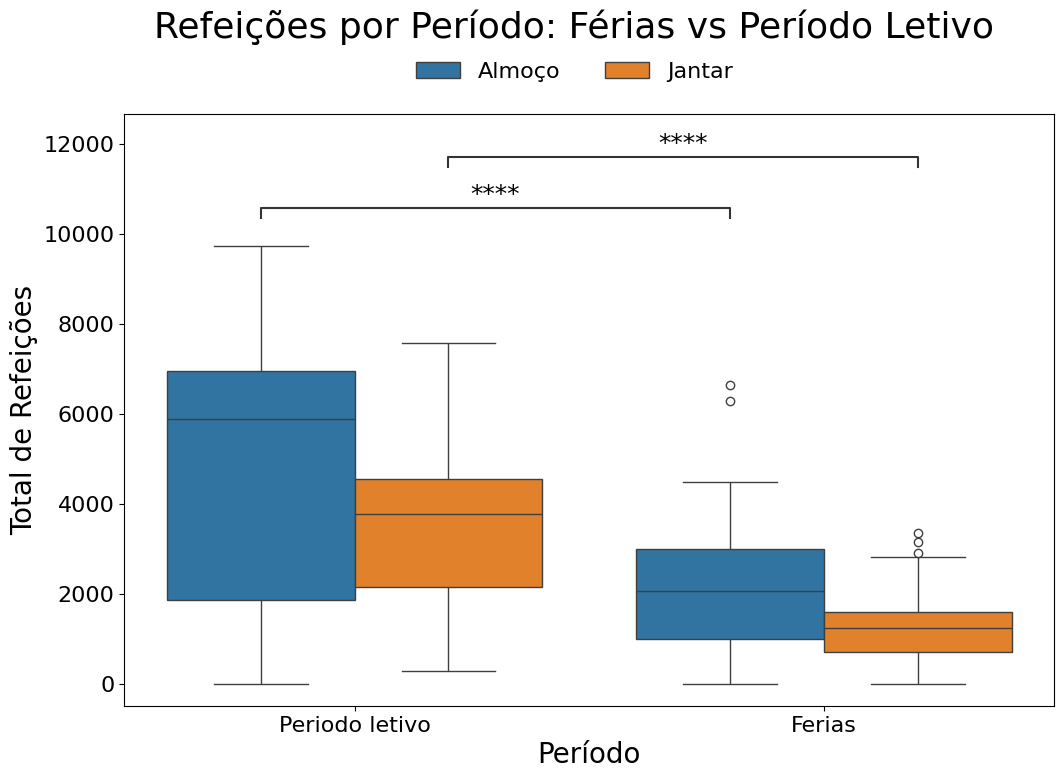

In [37]:
# Boxplot por período: Férias vs Período Letivo (uma linha de legenda centralizada)
from statannotations.Annotator import Annotator

# Detectar coluna de férias (suporta variações: 'Ferias', 'ferias', 'Férias', 'periodo_letivo', etc.)
possible_ferias_cols = ['Ferias', 'ferias', 'Férias', 'FERIAS', 'ferias_flag', 'periodo', 'periodo_letivo', 'Periodo letivo', 'Periodo_Letivo']
ferias_col = next((c for c in df.columns if c in possible_ferias_cols), None)

if ferias_col is None:
    # tentar detectar por aproximação (ignora acentos e minúsculas)
    def norm(c):
        import unicodedata
        return unicodedata.normalize('NFKD', str(c)).encode('ASCII', 'ignore').decode().lower()
    ferias_col = next((c for c in df.columns if norm(c) in ['ferias', 'feria', 'periodo', 'periodo_letivo', 'periodo letivo', 'vacation']), None)

if ferias_col is None:
    raise RuntimeError("Coluna de férias não encontrada no DataFrame. Procure por 'Ferias' ou variações similares.")

# Preparar coluna categorizada 'ferias_group' com dois valores: 'Periodo letivo' e 'Ferias'
def map_to_group(v):
    import unicodedata
    if pd.isna(v):
        return 'Periodo letivo'
    # números: 1 -> Ferias, 0 -> Periodo letivo (heurística)
    if isinstance(v, (int, float)):
        try:
            if int(v) == 1:
                return 'Ferias'
            else:
                return 'Periodo letivo'
        except Exception:
            pass
    s = str(v)
    s_norm = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode().lower()
    if 'fer' in s_norm or 'vac' in s_norm or 'férias' in s_norm or 'ferias' in s_norm:
        return 'Ferias'
    # palavras que indicam período letivo
    if 'letiv' in s_norm or 'aula' in s_norm or 'period' in s_norm or 'letivo' in s_norm:
        return 'Periodo letivo'
    # fallback: treat common truthy strings
    if s_norm in ['true', 'yes', 'sim']:
        return 'Ferias'
    return 'Periodo letivo'

# Criar cópia temporária com a coluna categorizada
df_plot = df.copy()
df_plot['ferias_group'] = df_plot[ferias_col].apply(map_to_group)

# Ordem desejada
order_groups = ['Periodo letivo', 'Ferias']

# Refeição (coluna) - mesmo heurístico de antes
meal_col = 'refeicao' if 'refeicao' in df_plot.columns else 'Refeicao' if 'Refeicao' in df_plot.columns else None
if meal_col is None:
    raise RuntimeError("Coluna de refeição ('refeicao' ou 'Refeicao') não encontrada no DataFrame.")

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(12, 8))

# Paleta: reutilizar a mesma lógica de cores por refeição
unique_meals = list(pd.Categorical(df_plot[meal_col]).categories) if hasattr(pd.Categorical(df_plot[meal_col]), 'categories') else list(df_plot[meal_col].unique())
blue = '#1f77b4'
orange = '#ff7f0e'
palette = {}
fallback_colors = iter(sns.color_palette('Set2', n_colors=max(3, len(unique_meals))))
import unicodedata
for meal in unique_meals:
    nm = unicodedata.normalize('NFKD', str(meal)).encode('ASCII', 'ignore').decode().lower()
    if 'almo' in nm or 'almoco' in nm:
        palette[meal] = blue
    elif 'jant' in nm or 'janta' in nm or 'jantar' in nm:
        palette[meal] = orange
    else:
        palette[meal] = next(fallback_colors)

# Fonte base (maior para todos os elementos)
plt.rcParams.update({'font.size': 20})

# Título e desenho do boxplot
fig.suptitle('Refeições por Período: Férias vs Período Letivo', fontsize=26, y=0.98)
ax = sns.boxplot(x='ferias_group', y='total_refeicao', hue=meal_col, data=df_plot, order=order_groups, palette=palette, ax=ax)

# Labels
ax.set_xticklabels(order_groups, fontsize=16)
ax.set_xlabel('Período', fontsize=20)
ax.set_ylabel('Total de Refeições', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

# Pegar legenda do eixo e removê-la para usar a do figure
handles, labels = ax.get_legend_handles_labels()
leg = ax.get_legend()
if leg is not None:
    leg.remove()

# Espaço para título + legenda
fig.subplots_adjust(top=0.85)

# Adicionar legenda das refeições como UMA LINHA centralizada entre título e plot
if labels:
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(labels), fontsize=16, title_fontsize=18, frameon=False)

# Anotações estatísticas: comparar cada refeição entre Periodo letivo e Ferias
box_pairs = []
for meal in unique_meals:
    has_per = ((df_plot[meal_col] == meal) & (df_plot['ferias_group'] == 'Periodo letivo')).any()
    has_fer = ((df_plot[meal_col] == meal) & (df_plot['ferias_group'] == 'Ferias')).any()
    if has_per and has_fer:
        box_pairs.append((('Periodo letivo', meal), ('Ferias', meal)))

if box_pairs:
    annotator = Annotator(ax, box_pairs, data=df_plot, x='ferias_group', y='total_refeicao', hue=meal_col)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0, fontsize=18)
    annotator.apply_test()
    annotator.annotate()
else:
    print('Nenhuma comparação válida entre períodos para as refeições (precisa haver observações em ambos os grupos).')

plt.show()


Categorias mapeadas (cardapio_merged): ['Feijoada_Strogonoff', 'Carne_Bovino_Suino_Frango', 'Peixe_Outros']

Contagem por categoria (cardapio_merged):
cardapio_merged
Carne_Bovino_Suino_Frango    819
Peixe_Outros                 130
Feijoada_Strogonoff           50
Name: count, dtype: int64

Valores originais contendo "suin" (após normalização):
cardapio_trans
   carne suína

Atenção: encontrei possíveis rótulos residuais contendo "suin": ['Carne_Bovino_Suino_Frango']

Tabela de significância estatística com categorias unificadas (corrigido):

                          Carne_Bovino_Suino_Frango Feijoada_Strogonoff  \
Carne_Bovino_Suino_Frango                         -                None   
Feijoada_Strogonoff                               *                   -   
Peixe_Outros                                   ****                ****   

                          Peixe_Outros  
Carne_Bovino_Suino_Frango         None  
Feijoada_Strogonoff               None  
Peixe_Outros             

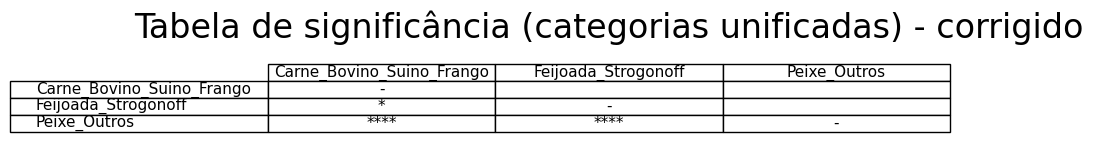


(Atualizado em 2025-10-28 16:07:51 )


In [45]:
# === Atualização: merge robusto e diagnóstico para resíduos 'carne suina' ===
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import unicodedata
import re

# 1) Criar df_merged unificando categorias (case-insensitive)
df_merged = df.copy()

def normalize_text(s):
    """Remove acentos, underscores, parênteses e normaliza para minúsculas sem pontuação."""
    if not isinstance(s, str):
        return ''
    # remover acentos
    s2 = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode()
    # substituir underscores e outros separadores por espaço
    s2 = re.sub(r'[\s_\-\(\)/]+', ' ', s2)
    return s2.strip().lower()

def merge_cat(x):
    lx = normalize_text(x)
    if lx == '':
        return 'Outros'

    # 1) Feijoada e Strogonoff juntos
    if 'feijoada' in lx or 'strogonoff' in lx or 'strogonov' in lx:
        return 'Feijoada_Strogonoff'

    # 2) Peixe e Outros juntos
    # consideramos variantes comuns de peixe e palavras que indicam 'outro(s)'
    if ('peixe' in lx or 'tilapia' in lx or 'tilápia' in lx or 'pescad' in lx
            or lx.startswith('outro') or 'outros' in lx or 'outro' in lx):
        return 'Peixe_Outros'

    # 3) Agrupar Bovino + Suíno + Frango numa única categoria de 'Carne'
    # usamos vários substrings para pegar variações e formas flexíveis
    carne_keywords = ['bov', 'boi', 'bife', 'carne', 'lagarto', 'iscas', 'acem', 'patinho',
                      'almond', 'almondega', 'almôndega', 'almondega', 'suin', 'suína', 'suina',
                      'bisteca', 'pernil', 'lingui', 'lombo', 'copa', 'frango', 'sobrecoxa', 'nugget', 'nuggets']
    for kw in carne_keywords:
        if kw in lx:
            return 'Carne_Bovino_Suino_Frango'

    # fallback: marcar como Outros para garantir categorias limpas
    return 'Outros'

# aplicar mantendo valores originais para as não unidas
df_merged['cardapio_merged'] = df_merged['cardapio_trans'].apply(merge_cat)

# Diagnóstico rápido para garantir que não haja resíduo 'carne suina'
mapped_values = df_merged['cardapio_merged'].unique().tolist()
print('\nCategorias mapeadas (cardapio_merged):', mapped_values)

# Mostrar contagens por categoria mapped
print('\nContagem por categoria (cardapio_merged):')
print(df_merged['cardapio_merged'].value_counts(dropna=False))

# Procurar entradas originais que contenham 'suin' após normalização (deve mapear para o grupo combinado)
suin_rows = df.copy()
suin_rows['norm'] = df['cardapio_trans'].apply(lambda s: normalize_text(s))
suin_hits = suin_rows[suin_rows['norm'].str.contains('suin', na=False)][['cardapio_trans']].drop_duplicates()
print('\nValores originais contendo "suin" (após normalização):')
print(suin_hits.to_string(index=False))

# Confirmar que nenhuma linha em cardapio_merged tem exatamente um label residual como 'carne suina'
residuals = [v for v in mapped_values if 'suin' in normalize_text(str(v)) and 'carne_bovina_suina_frango' not in str(v).lower()]
if residuals:
    print('\nAtenção: encontrei possíveis rótulos residuais contendo "suin":', residuals)
else:
    print('\nOK: não há rótulos residuais isolados contendo "suin" — todos foram mapeados para o grupo combinado.')

# 2) Função p-valor -> asteriscos (mesma convenção usada antes)
def pvalue_to_stars(p):
    if p > 0.05:
        return 'ns'
    elif p > 0.01:
        return '*'
    elif p > 0.001:
        return '**'
    elif p > 0.0001:
        return '***'
    else:
        return '****'

# 3) Calcular matriz triangular inferior de significâncias (Mann-Whitney)
categories = sorted(df_merged['cardapio_merged'].unique())
n = len(categories)
results = []
for i, cat1 in enumerate(categories):
    row = []
    for j, cat2 in enumerate(categories[:i+1]):
        if j == i:
            row.append('-')
        else:
            g1 = df_merged[df_merged['cardapio_merged'] == cat1]['total_refeicao']
            g2 = df_merged[df_merged['cardapio_merged'] == cat2]['total_refeicao']
            # Se algum grupo estiver vazio ou com menos de 2 observações, marca como NA
            if len(g1) < 2 or len(g2) < 2:
                row.append('NA')
            else:
                try:
                    _, p = mannwhitneyu(g1, g2)
                    row.append(pvalue_to_stars(p))
                except Exception:
                    row.append('err')
    results.append(row)

# 4) Montar DataFrame com os resultados
# Pad right rows to make a square layout for display
cell_text = []
for row in results:
    padded = list(row) + [''] * (n - len(row))
    cell_text.append(padded)

df_results_merged = pd.DataFrame(results, columns=categories[:n], index=categories)

# 5) Mostrar tabela textual
print('\nTabela de significância estatística com categorias unificadas (corrigido):\n')
print(df_results_merged)

# 6) Renderizar a tabela como imagem (matplotlib.table)
fig, ax = plt.subplots(figsize=(10, max(2, 0.6 * n)))
ax.set_axis_off()

table = ax.table(cellText=cell_text,
                 rowLabels=categories,
                 colLabels=categories,
                 cellLoc='center',
                 loc='center')

# Estilizar
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)

# Marcar cabeçalhos com cor suave
for (r, c), cell in table.get_celld().items():
    if r == -1 or c == -1:
        # some backends index headers differently; skip aggressive styling
        continue

plt.title('Tabela de significância (categorias unificadas) - corrigido')
plt.tight_layout()
plt.show()

# 7) print timestamp
from datetime import datetime
print('\n(Atualizado em', datetime.now().strftime('%Y-%m-%d %H:%M:%S'), ')')

In [42]:
# Tabela de categorias, palavras-chave e contagens — baseada na classificação do modelo
import unicodedata
from collections import OrderedDict

# Normalização auxiliar (remove acentos, deixa minúsculas)
def normalize(s):
    if not isinstance(s, str):
        return ''
    return unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode().lower()

# Definição das categorias e palavras-chave (conforme a imagem / case_when)
categories = OrderedDict([
    ('Bovino', ['boi', 'bovino', 'bife', 'carne', 'lagarto', 'iscas', 'acem', 'patinho', 'almondega', 'almôndega', 'almond', 'lagarto']),
    ('Frango', ['frango', 'sobrecoxa', 'nugget', 'nuggets']),
    ('Suíno', ['suino', 'bisteca', 'suína', 'suina', 'pernil', 'pernil', 'lingui', 'linguiça', 'linguiça toscana', 'copa lombo', 'copa', 'lombo']),
    ('Peixe', ['peixe', 'tilapia', 'tilápia', 'pescada']),
    ('Feijoada', ['feijoada']),
    ('Ovo', ['fritada', 'omelete', 'omeleta']),
    ('Bovino e Suíno', ['bovinos e suínos', 'bovinos e suinos', 'salsicha', 'salsich']),
    ('Outros', [])
])

# Preparar coluna normalizada com o texto original da categoria do cardápio
col = 'cardapio_trans' if 'cardapio_trans' in df.columns else None
if col is None:
    raise RuntimeError("Coluna 'cardapio_trans' não encontrada no DataFrame.")

norm_series = df[col].fillna('').astype(str).map(normalize)

# Função que atribui a categoria seguindo a ordem (como case_when)
def assign_category(text):
    for cat, keys in categories.items():
        if keys:  # verificar cada palavra-chave
            for k in keys:
                if k and k in text:
                    return cat
    return 'Outros'

assigned = norm_series.map(assign_category)

# Contagens
counts = assigned.value_counts().reindex(list(categories.keys())).fillna(0).astype(int)

# Montar coluna de keywords como string para exibição (modelo da tabela)
keywords_display = {cat: ', '.join(keys) if keys else '' for cat, keys in categories.items()}

# Construir DataFrame final
import pandas as pd
table = pd.DataFrame({
    'Categoria Padrão': list(categories.keys()),
    'Informação': [keywords_display[c] for c in categories.keys()],
    'Quantidade': [int(counts[c]) for c in categories.keys()]
})

# Ajuste: colocar 'Outros' no final (já está pela OrderedDict)
print('\nTabela de categorias (baseada no modelo):')
print(table.to_string(index=False))

# Salvar CSV para inspeção
table.to_csv('categorias_por_modelo.csv', index=False)
print('\nArquivo salvo: categorias_por_modelo.csv')

# Exibir também um resumo por categoria (mapeamento aplicado em linhas originais) para auditoria
df_audit = df.copy()
df_audit['categoria_modelo'] = assigned
print('\nAmostra de linhas com a categoria atribuída:')
print(df_audit[[col, 'categoria_modelo']].head(10).to_string(index=False))



Tabela de categorias (baseada no modelo):
Categoria Padrão                                                                                                Informação  Quantidade
          Bovino            boi, bovino, bife, carne, lagarto, iscas, acem, patinho, almondega, almôndega, almond, lagarto         547
          Frango                                                                        frango, sobrecoxa, nugget, nuggets         272
           Suíno suino, bisteca, suína, suina, pernil, pernil, lingui, linguiça, linguiça toscana, copa lombo, copa, lombo           0
           Peixe                                                                          peixe, tilapia, tilápia, pescada         106
        Feijoada                                                                                                  feijoada          18
             Ovo                                                                                 fritada, omelete, omeleta           0
  Bovino e S

C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\2429889525.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardapio_merged', y='total_refeicao', data=df_merged, order=categories, palette='Set2', ax=ax)
C:\Users\Felee\AppData\Local\Temp\ipykernel_30688\2429889525.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),  fontsize=18)


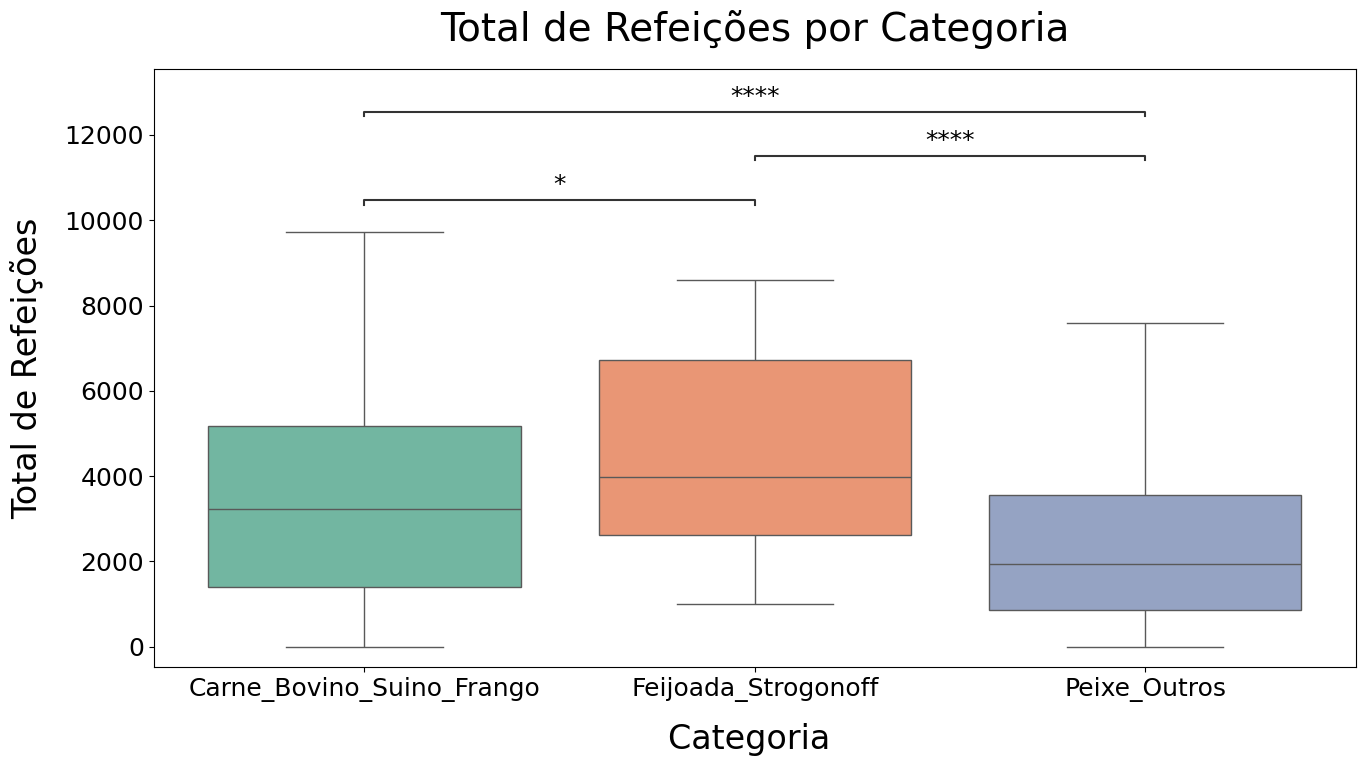

In [50]:
# --- Boxplot usando `df_merged` com anotações estatísticas (Mann-Whitney) ---
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Garantir que `df_merged` exista
if 'df_merged' not in globals():
    raise RuntimeError('df_merged não encontrado. Execute a célula que cria df_merged antes desta.')

# Categorias (ordenadas) e comparações válidas (ambos grupos com >=2 observações)
categories = sorted(df_merged['cardapio_merged'].unique())
valid_comparisons = []
for a, b in combinations(categories, 2):
    g1 = df_merged[df_merged['cardapio_merged'] == a]['total_refeicao']
    g2 = df_merged[df_merged['cardapio_merged'] == b]['total_refeicao']
    if len(g1) >= 2 and len(g2) >= 2:
        valid_comparisons.append((a, b))

# Plot
plt.rcParams.update({'font.size': 18})  # Aumentando o tamanho base da fonte global
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='cardapio_merged', y='total_refeicao', data=df_merged, order=categories, palette='Set2', ax=ax)

# Ajustando os rótulos e fontes
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=18)
ax.set_xlabel('Categoria ', fontsize=24, labelpad=15)
ax.set_ylabel('Total de Refeições', fontsize=24, labelpad=15)
ax.set_title('Total de Refeições por Categoria', fontsize=28, pad=20)

# Aumentando o tamanho dos números nos eixos
ax.tick_params(axis='both', which='major', labelsize=18)

# Anotações estatísticas (apenas se houver comparações válidas)
if valid_comparisons:
    annotator = Annotator(ax, valid_comparisons, data=df_merged, x='cardapio_merged', y='total_refeicao')
    # Configurando para posicionar as anotações abaixo do título
    annotator.configure(test='Mann-Whitney', 
                       text_format='star', 
                       loc='inside',           # Mudando para inside
                       line_height=0.01,       # Reduzindo a altura da linha
                       text_offset=2,          # Reduzindo o offset do texto
                       fontsize=18,            # Aumentando o tamanho da fonte das anotações
                       verbose=0)
    annotator.apply_test()
    annotator.annotate()
else:
    print('Nenhuma comparação válida: poucas observações em várias categorias (precisa de >=2 por grupo).')

plt.tight_layout()
plt.show()

In [44]:
# Exportar df_merged para CSV
df_merged.to_csv('data_final.csv', index=False)
df_merged['cardapio_merged'].value_counts()

cardapio_merged
carne_bovina_suina_frango    819
outros_peixe                 130
feijoada_strogonoff           50
Name: count, dtype: int64